In [1]:
#importing the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#### Problem Statement

- Insurance Claim related fraud is a huge problem in the insurance industry.It is quite complex and difficult to identify those unwanted claims.With XgBoost Classifier Machine Learning Algorithm, I am trying to troubleshoot and help the General Insurance industry with this problem.
- The data that I have is from Automobile Insurance.I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO, is a Binary Classification task. A comparison study has been performed to understand which ML algorithm suits best.

In [2]:
#load & view raw data

df = pd.read_csv("Master_Train+Test_Data.csv",sep=",")

In [3]:
df.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,03-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,119121,49,25-10-1998,State1,100/300,1000,1632.73,0,not-in-family,N
1,Cust10001,02-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,119122,114,15-11-2000,State1,100/300,1000,1255.19,0,not-in-family,N
2,Cust10002,15-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,119123,167,12-02-2001,State3,500/1000,617,1373.38,0,wife,N
3,Cust10003,19-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,119124,190,11-04-2005,State2,500/1000,722,1337.60,0,own-child,Y
4,Cust10004,09-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,119125,115,25-10-1996,State2,100/300,500,1353.73,4279863,unmarried,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37748 entries, 0 to 37747
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  37748 non-null  object 
 1   DateOfIncident              37748 non-null  object 
 2   TypeOfIncident              37748 non-null  object 
 3   TypeOfCollission            37748 non-null  object 
 4   SeverityOfIncident          37748 non-null  object 
 5   AuthoritiesContacted        37748 non-null  object 
 6   IncidentState               37748 non-null  object 
 7   IncidentCity                37748 non-null  object 
 8   IncidentAddress             37748 non-null  object 
 9   IncidentTime                37748 non-null  int64  
 10  NumberOfVehicles            37748 non-null  int64  
 11  PropertyDamage              37748 non-null  object 
 12  BodilyInjuries              37748 non-null  int64  
 13  Witnesses                   377

In [5]:
df.shape

(37748, 38)

In [6]:
df.nunique()

CustomerID                    37748
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  4
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                     25
NumberOfVehicles                  4
PropertyDamage                    3
BodilyInjuries                    3
Witnesses                         4
PoliceReport                      3
AmountOfTotalClaim            26657
AmountOfInjuryClaim           13147
AmountOfPropertyClaim         12945
AmountOfVehicleDamage         23855
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                     

### Exploratory Data Analysis

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

CustomerID                     0
DateOfIncident                 0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentAddress                0
IncidentTime                   0
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                      0
PoliceReport                   0
AmountOfTotalClaim             0
AmountOfInjuryClaim            0
AmountOfPropertyClaim          0
AmountOfVehicleDamage          0
InsuredAge                     0
InsuredZipCode                 0
InsuredGender                 38
InsuredEducationLevel          0
InsuredOccupation              0
InsuredHobbies                 0
CapitalGains                   0
CapitalLoss                    0
Country                        0
InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPoli

In [9]:
df.isna().sum()

CustomerID                     0
DateOfIncident                 0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentAddress                0
IncidentTime                   0
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                      0
PoliceReport                   0
AmountOfTotalClaim             0
AmountOfInjuryClaim            0
AmountOfPropertyClaim          0
AmountOfVehicleDamage          0
InsuredAge                     0
InsuredZipCode                 0
InsuredGender                 38
InsuredEducationLevel          0
InsuredOccupation              0
InsuredHobbies                 0
CapitalGains                   0
CapitalLoss                    0
Country                        0
InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPoli

In [10]:
InsuredGender = df['InsuredGender'].isna().sum()
total_rows = df.shape[0]
print("Percentage of null values in Insured Gender column = ",(InsuredGender / total_rows) *100)

Percentage of null values in Insured Gender column =  0.10066758503761788


In [11]:
# Replacing the null values with the mode & mean as per the datatype of column
mode_gender = stats.mode(df['InsuredGender']).mode[0]
df['InsuredGender'].fillna(mode_gender, inplace=True)

In [12]:
df.isna().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

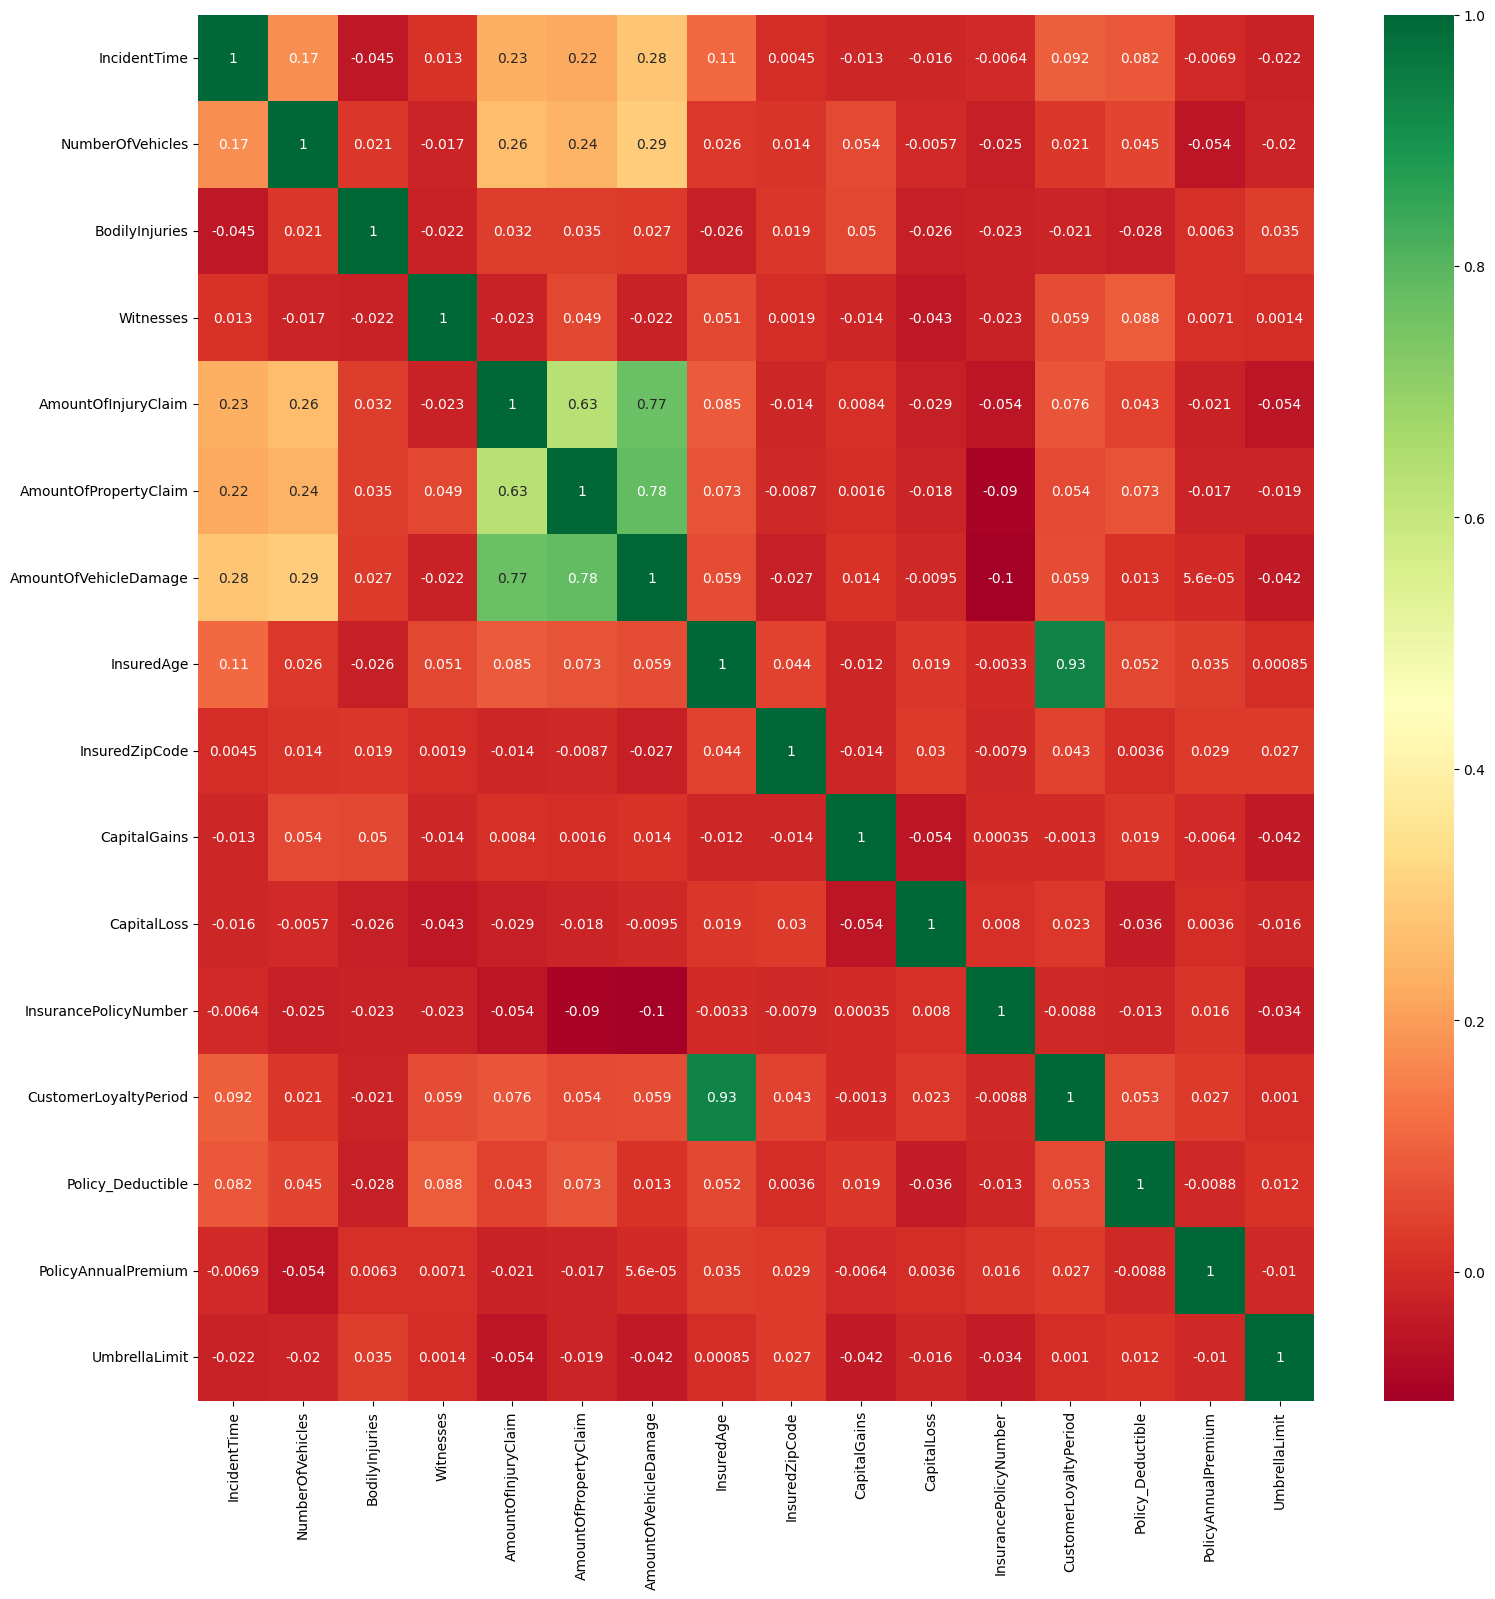

In [13]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

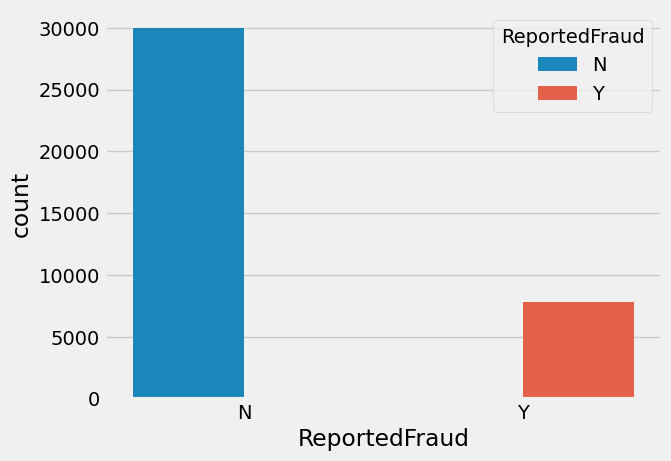

In [14]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='ReportedFraud', data=df, hue='ReportedFraud')

In [15]:
df['ReportedFraud'].value_counts() # Count number of frauds vs non-frauds


N    29963
Y     7785
Name: ReportedFraud, dtype: int64

In [16]:
df['IncidentState'].value_counts()


State5    10375
State7     9304
State9     8141
State8     4191
State4     3910
State6     1051
State3      776
Name: IncidentState, dtype: int64

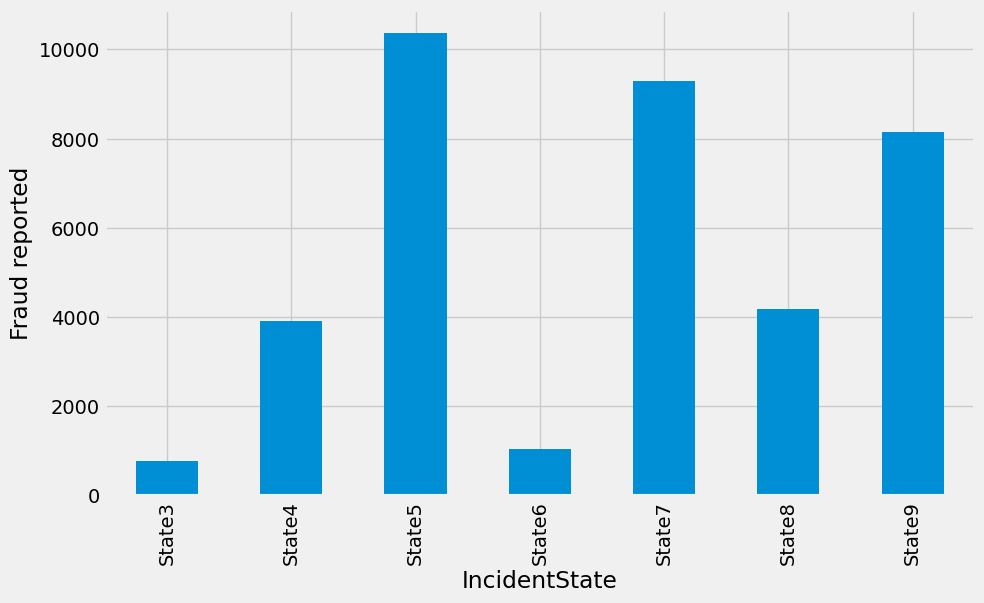

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('IncidentState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

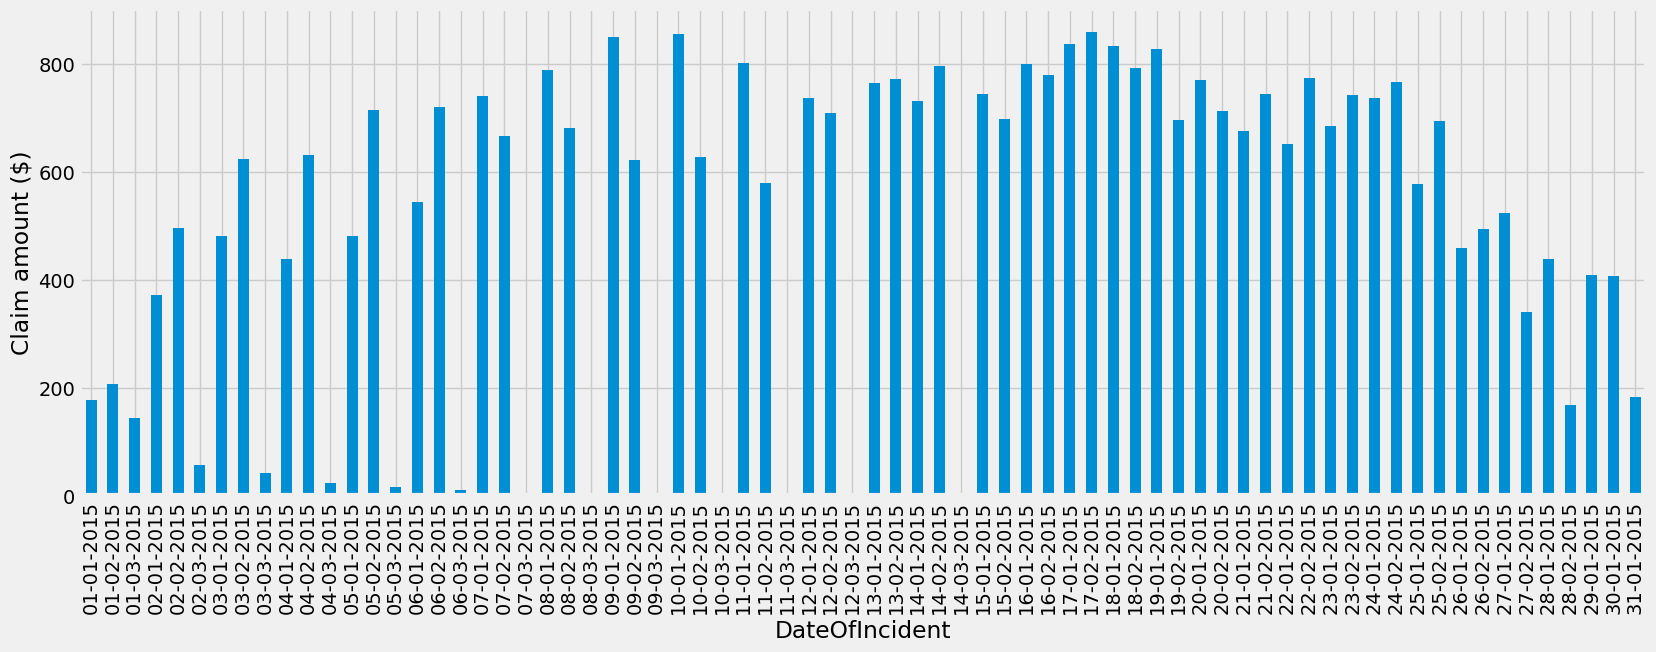

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('DateOfIncident').AmountOfTotalClaim.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

### We can see that, all the cases in above plot are for the months of January, February and March 2015

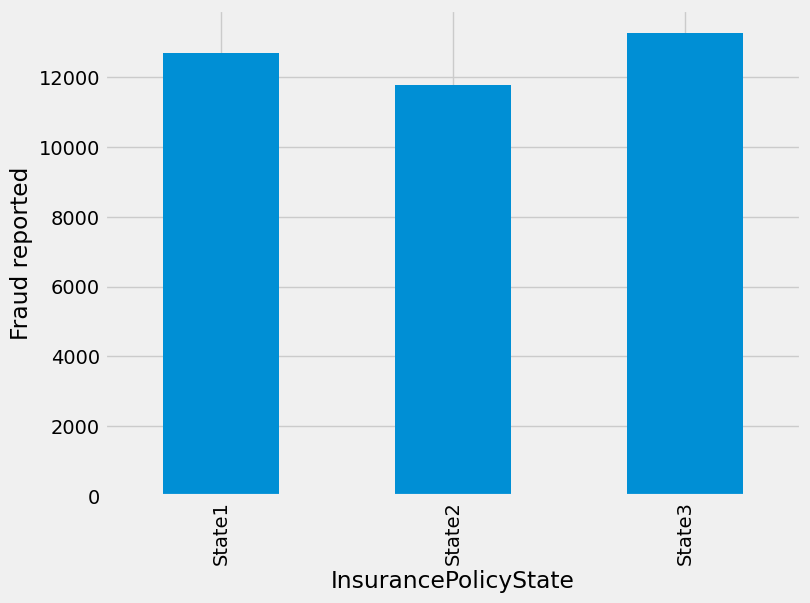

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = df.groupby('InsurancePolicyState').ReportedFraud.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

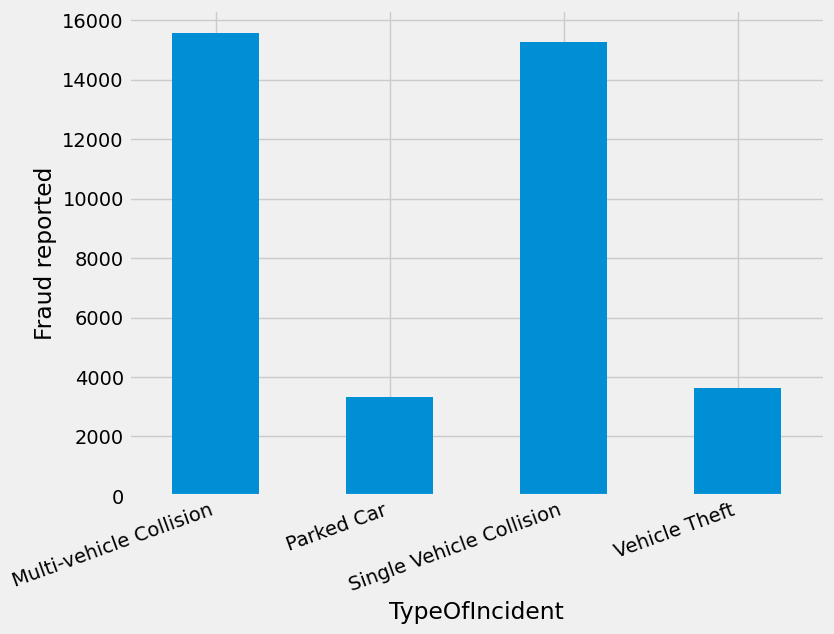

In [20]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = df.groupby('TypeOfIncident').ReportedFraud.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

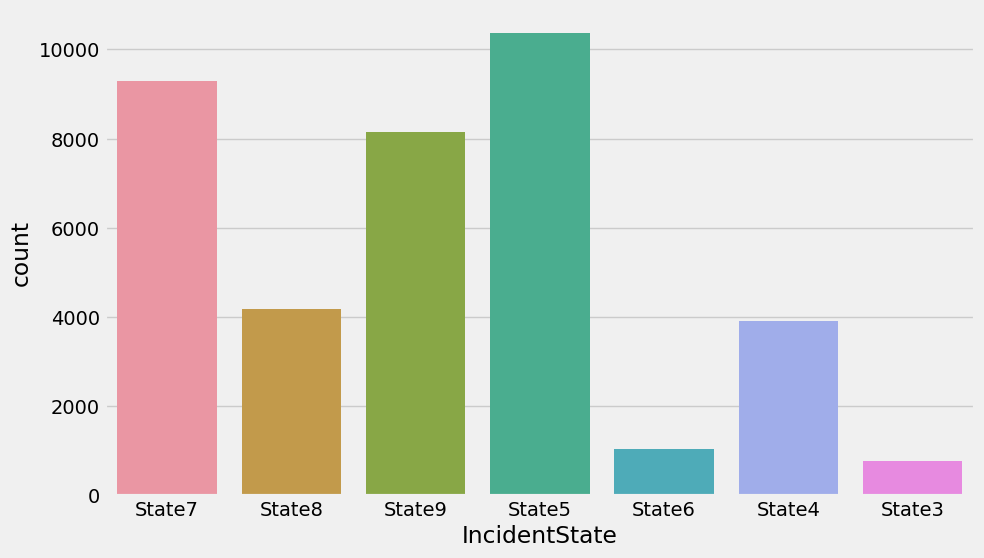

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='IncidentState', data=df)

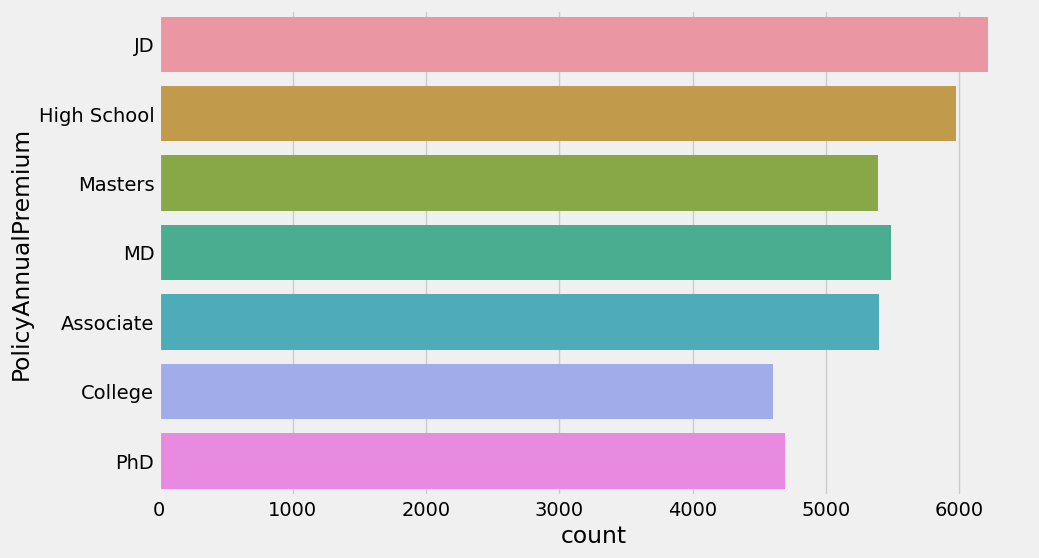

In [22]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'InsuredEducationLevel', data=df) 
ax.set_ylabel('PolicyAnnualPremium')
plt.show()

#Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported

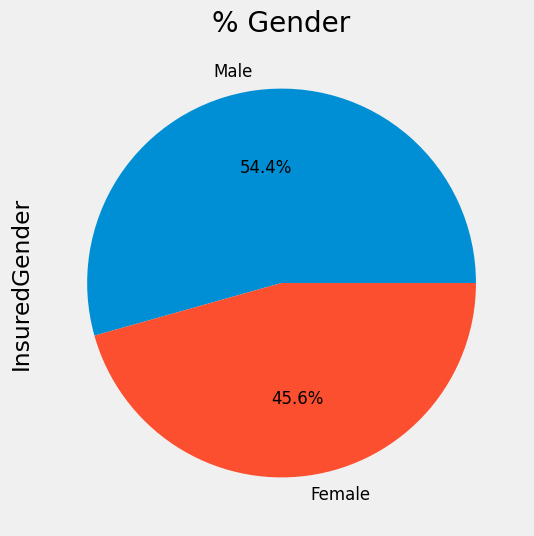

In [23]:
fig = plt.figure(figsize=(10,6))
ax = (df['InsuredGender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

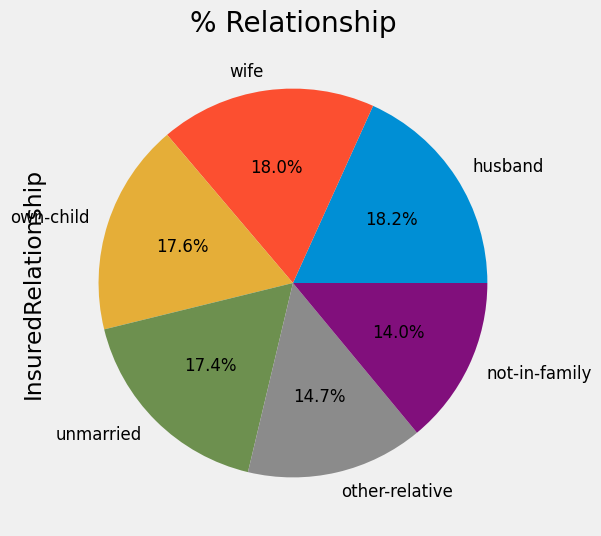

In [24]:
fig = plt.figure(figsize=(10,6))
ax = (df['InsuredRelationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

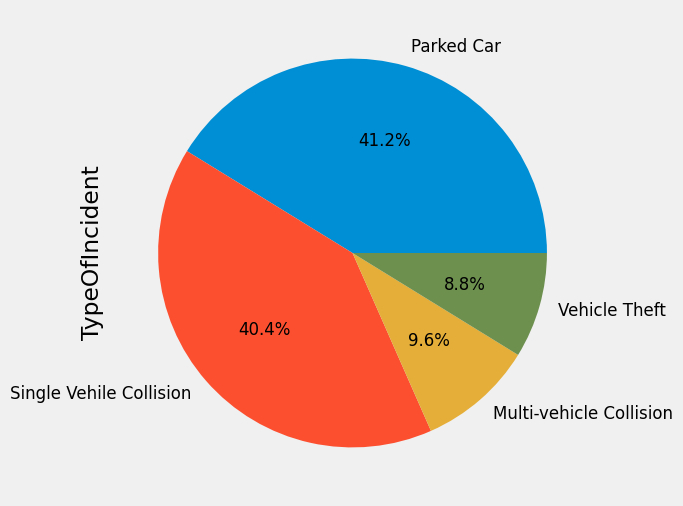

In [25]:
fig = plt.figure(figsize=(10,6))
ax = (df['TypeOfIncident'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

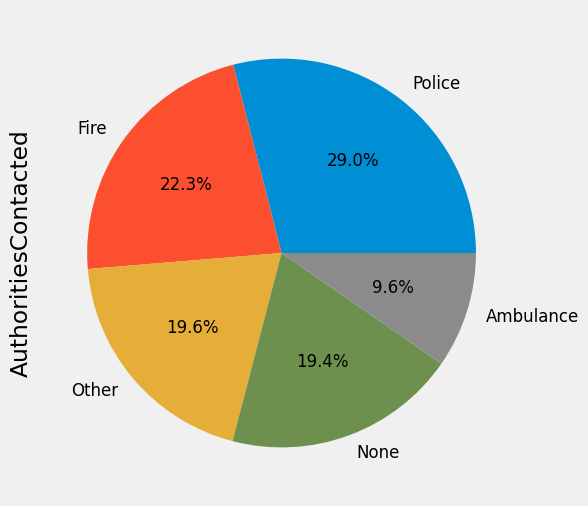

In [26]:
fig = plt.figure(figsize=(10,6))
ax = (df['AuthoritiesContacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

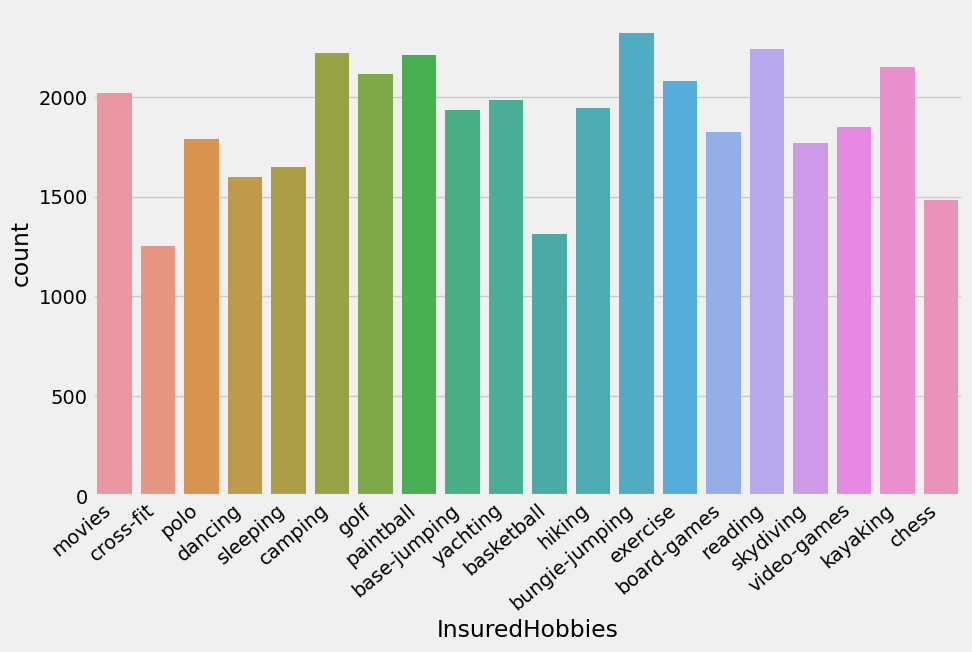

In [27]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='InsuredHobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [28]:
df["InsuredOccupation"].value_counts()

machine-op-inspct    3628
prof-specialty       3066
tech-support         2964
priv-house-serv      2878
sales                2828
craft-repair         2811
exec-managerial      2758
transport-moving     2679
armed-forces         2662
other-service        2582
adm-clerical         2536
protective-serv      2297
farming-fishing      2090
handlers-cleaners    1969
Name: InsuredOccupation, dtype: int64

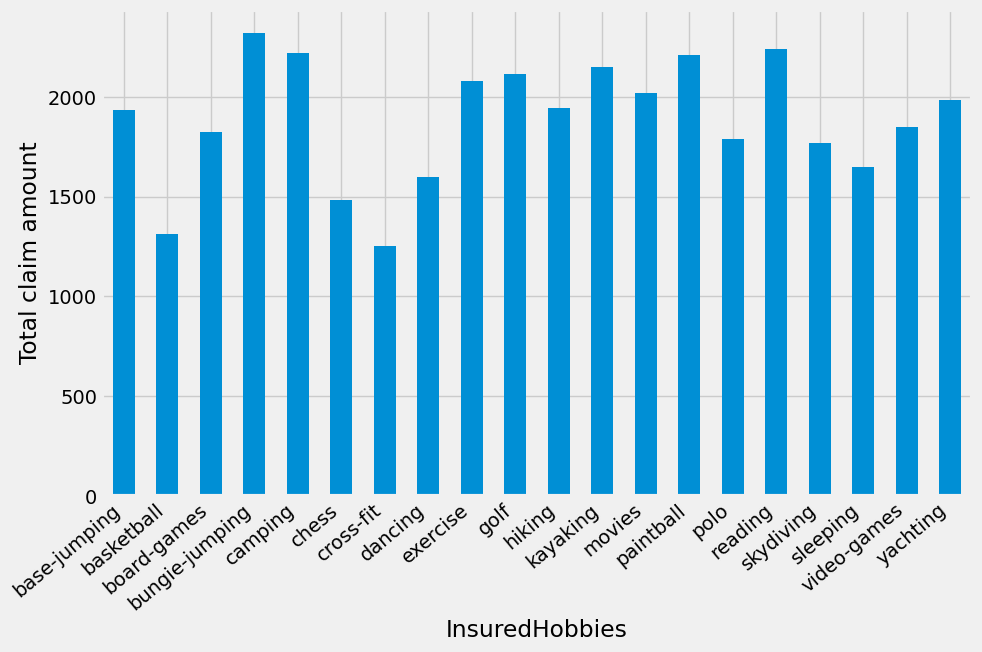

In [29]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('InsuredHobbies').AmountOfTotalClaim.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

### Data Preprocessing
- Cleaning the data and prepare it for machine learning model.

In [30]:
df['ReportedFraud'].replace(to_replace='Y', value=1, inplace=True)
df['ReportedFraud'].replace(to_replace='N',  value=0, inplace=True)

df.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Cust10000,03-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,119121,49,25-10-1998,State1,100/300,1000,1632.73,0,not-in-family,0
1,Cust10001,02-02-2015,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,119122,114,15-11-2000,State1,100/300,1000,1255.19,0,not-in-family,0
2,Cust10002,15-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,119123,167,12-02-2001,State3,500/1000,617,1373.38,0,wife,0
3,Cust10003,19-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,119124,190,11-04-2005,State2,500/1000,722,1337.60,0,own-child,1
4,Cust10004,09-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,119125,115,25-10-1996,State2,100/300,500,1353.73,4279863,unmarried,1


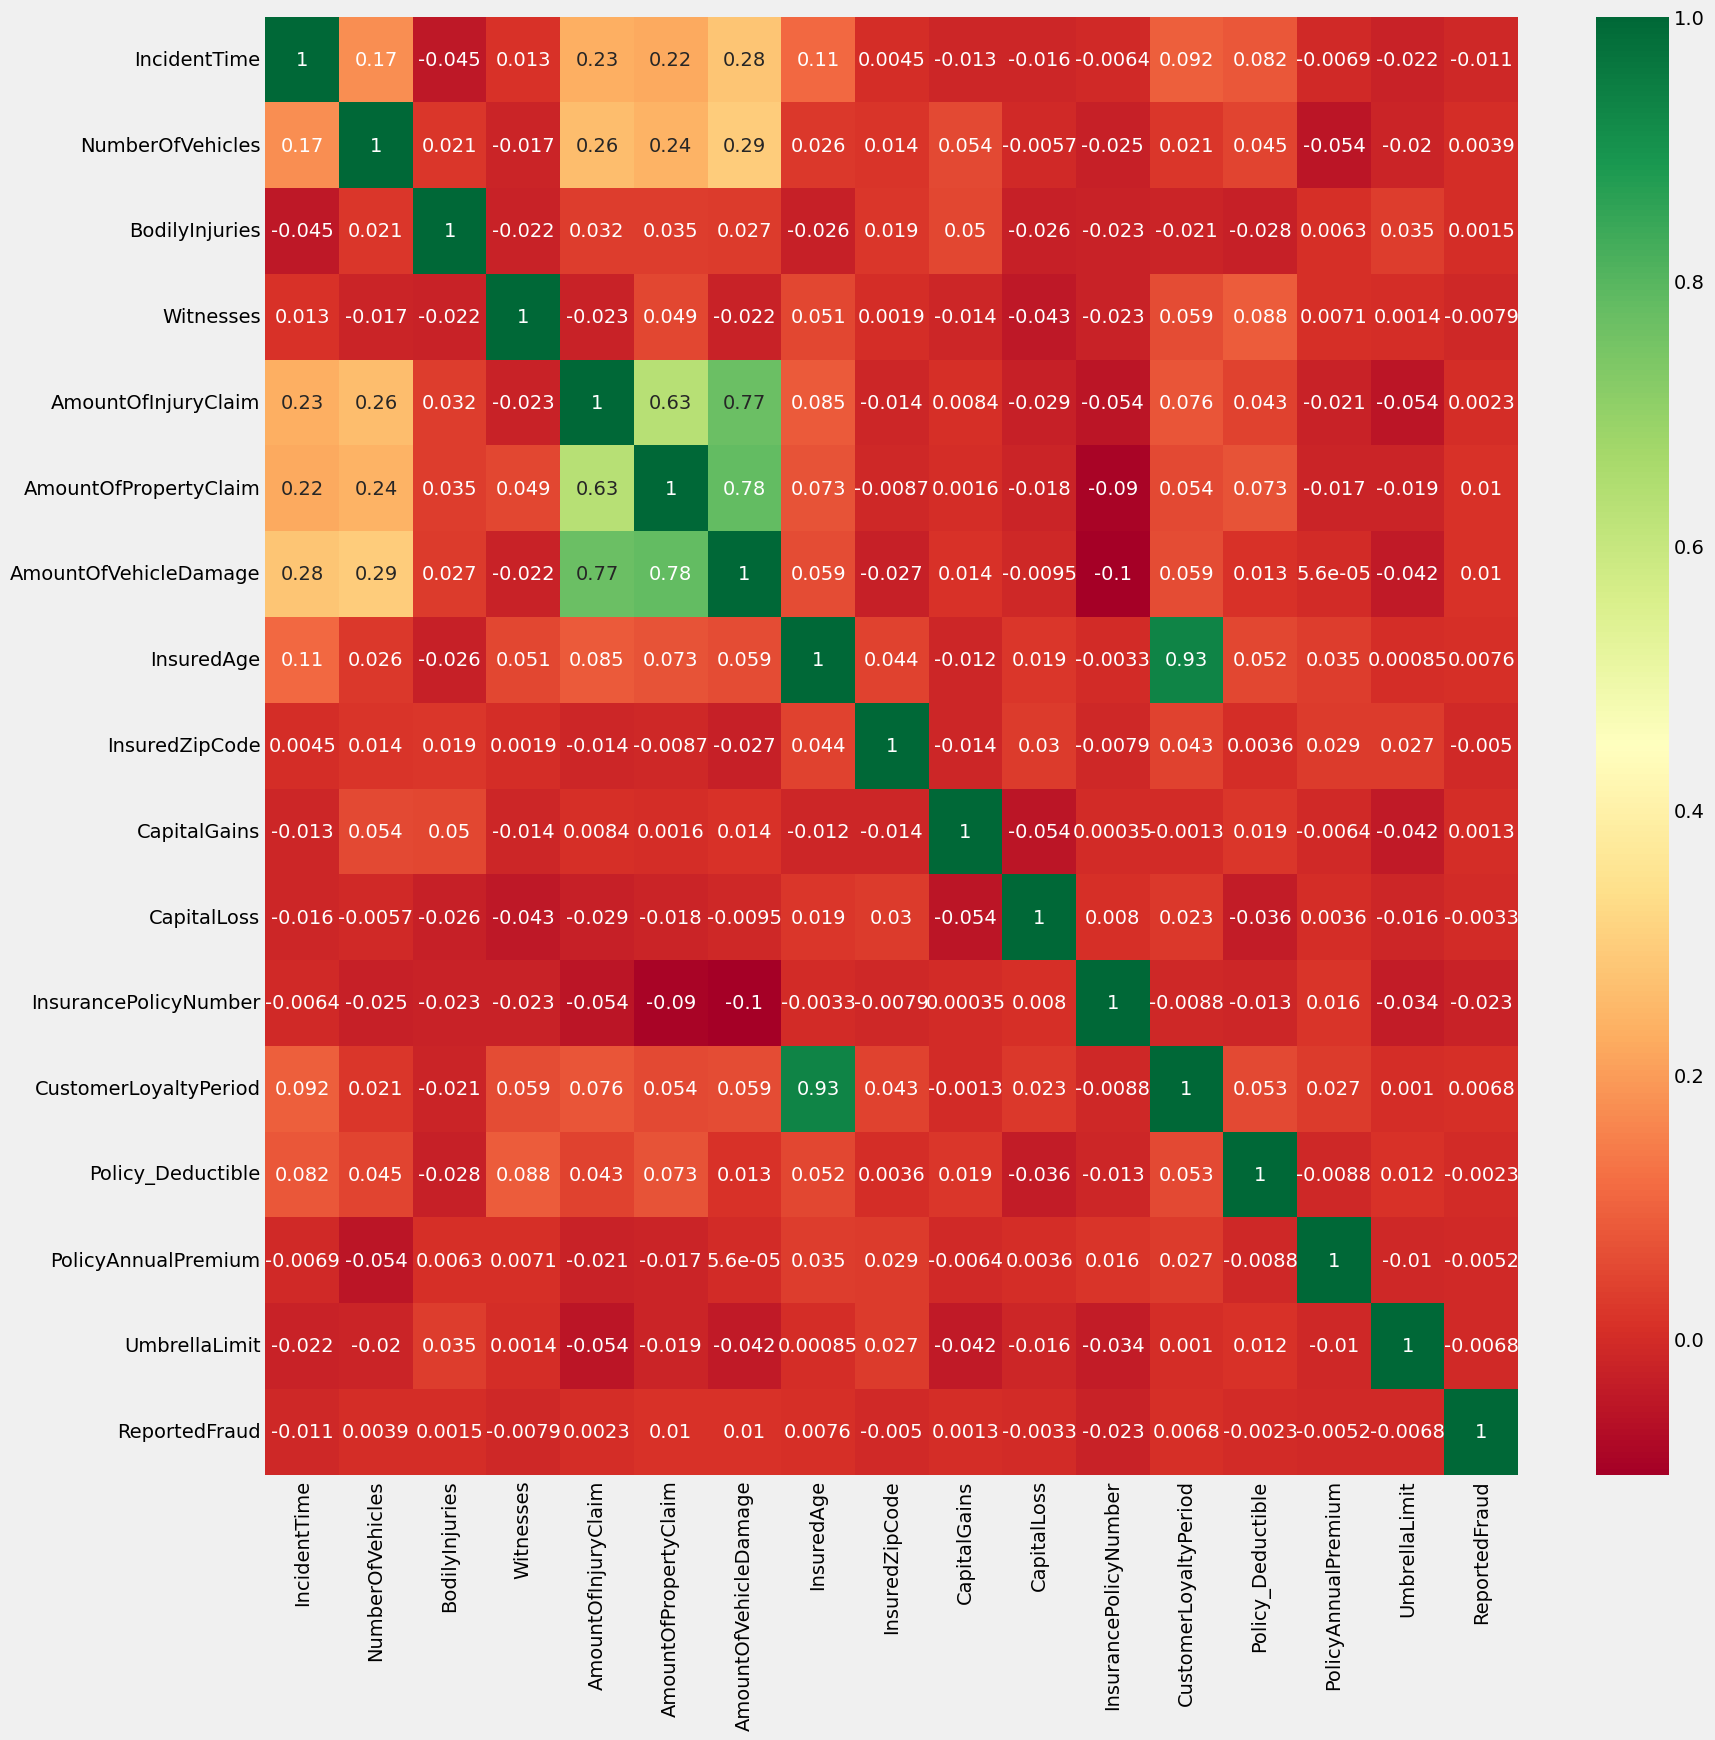

In [31]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(18,18))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
df.describe()

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,ReportedFraud
count,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,37748.000000,3.774800e+04,37748.000000
mean,11.752358,1.818110,0.986383,1.490437,7308.069275,7243.890166,37468.600588,38.798400,502229.227482,23148.360178,-25041.016743,129588.608297,203.064878,1116.477774,1255.069228,9.714364e+05,0.206236
std,6.170602,0.978362,0.784533,1.041532,4432.647145,4374.484454,18077.387098,7.977104,72203.954251,27681.270770,27941.739741,11070.022842,99.577289,548.182871,223.346744,1.957765e+06,0.404607
min,-5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000,19.000000,430104.000000,0.000000,-111100.000000,110122.000000,0.000000,500.000000,-1.000000,-1.000000e+06,0.000000
25%,6.000000,1.000000,0.000000,1.000000,4668.000000,4770.000000,31754.750000,33.000000,448310.000000,0.000000,-50000.000000,120083.750000,126.000000,622.000000,1120.152500,0.000000e+00,0.000000
50%,12.000000,1.000000,1.000000,1.000000,7144.500000,7038.000000,42314.000000,38.000000,466634.000000,0.000000,0.000000,129649.500000,199.000000,1000.000000,1265.095000,0.000000e+00,0.000000
75%,17.000000,3.000000,2.000000,2.000000,10525.250000,10283.500000,49461.250000,44.000000,603733.000000,49500.000000,0.000000,139182.250000,266.000000,1639.250000,1397.055000,4.439995e+05,0.000000
max,23.000000,4.000000,2.000000,3.000000,21450.000000,23670.000000,79560.000000,64.000000,620962.000000,100500.000000,0.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,1.000000


In [33]:
df.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud'],
      dtype='object')

In [34]:
# Check on categorical variables:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport',
       'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'Country',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship'],
      dtype='object')

In [35]:
# identify variables with '?' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)


                                0
CustomerID                      0
DateOfIncident                  0
TypeOfIncident                  0
TypeOfCollission             6925
SeverityOfIncident              0
AuthoritiesContacted            0
IncidentState                   0
IncidentCity                    0
IncidentAddress                 0
PropertyDamage              13658
PoliceReport                12819
AmountOfTotalClaim              0
InsuredGender                   0
InsuredEducationLevel           0
InsuredOccupation               0
InsuredHobbies                  0
Country                         0
DateOfPolicyCoverage            0
InsurancePolicyState            0
Policy_CombinedSingleLimit      0
InsuredRelationship             0


In [36]:
df.PropertyDamage.value_counts()

?      13658
NO     12726
YES    11364
Name: PropertyDamage, dtype: int64

In [37]:
df.PoliceReport.value_counts()


NO     12953
?      12819
YES    11976
Name: PoliceReport, dtype: int64

In [38]:
df.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'ReportedFraud'],
      dtype='object')

In [39]:
# dropping unimportant columns

df = df.drop(columns = [
    'CustomerID',
    'DateOfIncident', 
    'TypeOfCollission',
    'IncidentAddress',
    'IncidentTime',
    'PropertyDamage',
    'PropertyDamage',
    'PoliceReport',
    'AmountOfTotalClaim',
    'InsuredAge',
    'InsuredZipCode',
    'Country',
    'InsurancePolicyNumber', 
    'InsuredZipCode',
    'CustomerLoyaltyPeriod',
    'DateOfPolicyCoverage'])

df.head(5)

,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,...,InsuredHobbies,CapitalGains,CapitalLoss,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,ReportedFraud
0,Multi-vehicle Collision,Total Loss,Police,State7,City1,3,1,0,13417,6071,...,movies,56700,-48500,State1,100/300,1000,1632.73,0,not-in-family,0
1,Multi-vehicle Collision,Total Loss,Police,State7,City5,3,2,1,15560,5919,...,cross-fit,70600,-48500,State1,100/300,1000,1255.19,0,not-in-family,0
2,Single Vehicle Collision,Minor Damage,Other,State8,City6,1,2,3,11630,11630,...,polo,66400,-63700,State3,500/1000,617,1373.38,0,wife,0
3,Single Vehicle Collision,Minor Damage,Other,State9,City6,1,2,3,12003,12003,...,polo,47900,-73400,State2,500/1000,722,1337.60,0,own-child,1
4,Single Vehicle Collision,Minor Damage,Fire,State8,City6,1,2,1,8829,7234,...,dancing,0,-41500,State2,100/300,500,1353.73,4279863,unmarried,1


In [40]:
df._get_numeric_data().head()  # Checking numeric columns

,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,CapitalGains,CapitalLoss,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,ReportedFraud
0,3,1,0,13417,6071,46013,56700,-48500,1000,1632.73,0,0
1,3,2,1,15560,5919,39903,70600,-48500,1000,1255.19,0,0
2,1,2,3,11630,11630,43495,66400,-63700,617,1373.38,0,0
3,1,2,3,12003,12003,42237,47900,-73400,722,1337.60,0,1
4,1,2,1,8829,7234,37481,0,-41500,500,1353.73,4279863,1


In [41]:
df._get_numeric_data().columns

Index(['NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'CapitalGains', 'CapitalLoss', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'ReportedFraud'],
      dtype='object')

In [42]:
df.select_dtypes(include=['object']).columns  # checking categorcial columns

Index(['TypeOfIncident', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship'],
      dtype='object')

#### Applying one-hot encoding to convert all categorical variables except out target variable
'ReportedFraud'

In [43]:
numerical_col = ['NumberOfVehicles', 'BodilyInjuries','Witnesses',
                 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
                 'CapitalGains','CapitalLoss', 'Policy_Deductible',
                 'PolicyAnnualPremium', 'UmbrellaLimit']
categorical_col = ['TypeOfIncident', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'InsurancePolicyState', 'Policy_CombinedSingleLimit',
       'InsuredRelationship']

In [44]:
y=df['ReportedFraud']
X=df[numerical_col + categorical_col]

In [45]:
X.head()

,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,CapitalGains,CapitalLoss,Policy_Deductible,PolicyAnnualPremium,...,AuthoritiesContacted,IncidentState,IncidentCity,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship
0,3,1,0,13417,6071,46013,56700,-48500,1000,1632.73,...,Police,State7,City1,MALE,JD,armed-forces,movies,State1,100/300,not-in-family
1,3,2,1,15560,5919,39903,70600,-48500,1000,1255.19,...,Police,State7,City5,MALE,JD,tech-support,cross-fit,State1,100/300,not-in-family
2,1,2,3,11630,11630,43495,66400,-63700,617,1373.38,...,Other,State8,City6,MALE,JD,armed-forces,polo,State3,500/1000,wife
3,1,2,3,12003,12003,42237,47900,-73400,722,1337.60,...,Other,State9,City6,MALE,JD,armed-forces,polo,State2,500/1000,own-child
4,1,2,1,8829,7234,37481,0,-41500,500,1353.73,...,Fire,State8,City6,FEMALE,High School,exec-managerial,dancing,State2,100/300,unmarried


In [46]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: ReportedFraud, dtype: int64

In [47]:
X.columns

Index(['NumberOfVehicles', 'BodilyInjuries', 'Witnesses',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'CapitalGains', 'CapitalLoss', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'TypeOfIncident',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'InsuredRelationship'],
      dtype='object')

#### Performing feature scaling using Standard Scaler

In [48]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(X[['NumberOfVehicles', 'BodilyInjuries','Witnesses', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'CapitalGains',
       'CapitalLoss', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit']])

StandardScaler()

In [49]:
# transform the train and test set, and add on the Id and SalePrice variables
x = pd.concat([X[categorical_col].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(X[numerical_col]), columns=numerical_col)],
                    axis=1)

In [50]:
X.head()

,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,CapitalGains,CapitalLoss,Policy_Deductible,PolicyAnnualPremium,...,AuthoritiesContacted,IncidentState,IncidentCity,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_CombinedSingleLimit,InsuredRelationship
0,3,1,0,13417,6071,46013,56700,-48500,1000,1632.73,...,Police,State7,City1,MALE,JD,armed-forces,movies,State1,100/300,not-in-family
1,3,2,1,15560,5919,39903,70600,-48500,1000,1255.19,...,Police,State7,City5,MALE,JD,tech-support,cross-fit,State1,100/300,not-in-family
2,1,2,3,11630,11630,43495,66400,-63700,617,1373.38,...,Other,State8,City6,MALE,JD,armed-forces,polo,State3,500/1000,wife
3,1,2,3,12003,12003,42237,47900,-73400,722,1337.60,...,Other,State9,City6,MALE,JD,armed-forces,polo,State2,500/1000,own-child
4,1,2,1,8829,7234,37481,0,-41500,500,1353.73,...,Fire,State8,City6,FEMALE,High School,exec-managerial,dancing,State2,100/300,unmarried


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  30198 7550
length of y_train and y_test:  30198 7550


In [52]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe.fit(X[['TypeOfIncident',
    'SeverityOfIncident',
    'AuthoritiesContacted',
    'IncidentState',
    'IncidentCity',
    'InsuredGender', 
    'InsuredEducationLevel',
    'InsuredOccupation', 
    'InsuredHobbies',
    'InsurancePolicyState',
    'Policy_CombinedSingleLimit',
    'InsuredRelationship']])

OneHotEncoder()

In [53]:
#Creating a column transformer to transform categorical columns
from sklearn.compose import make_column_transformer

In [54]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['TypeOfIncident',
    'SeverityOfIncident',
    'AuthoritiesContacted',
    'IncidentState',
    'IncidentCity',
    'InsuredGender', 
    'InsuredEducationLevel',
    'InsuredOccupation', 
    'InsuredHobbies',
    'InsurancePolicyState',
    'Policy_CombinedSingleLimit',
    'InsuredRelationship']),remainder='passthrough')

In [55]:
numeric_column = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                          ['NumberOfVehicles', 'BodilyInjuries','Witnesses', 'AmountOfInjuryClaim',
                                           'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'CapitalGains',
                                           'CapitalLoss', 'Policy_Deductible', 'PolicyAnnualPremium',
                                           'UmbrellaLimit']),remainder='passthrough')

In [56]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)

In [57]:
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(column_trans,model)

In [58]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Multi-vehicle Collision', 'Parked Car',
       'Single Vehicle Collision', 'Vehicle Theft'], dtype=object),
                                                                            array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object),
                                                                            array(['Ambulance', 'Fire', 'None', 'Oth...
       'unmarried', 'wife'], dtype=object)]),
                                                  ['TypeOfIncident',
                                                   'SeverityOfIncident',
                                                   'AuthoritiesContacted',
                                                   'IncidentState',
                                                   'IncidentCity',
                                                   'InsuredGender',
                                                   'InsuredEducationLevel',
                                                   'InsuredOccupation',
                                                   'InsuredHobbies',
                                                   'InsurancePolicyState',
                                                   'Policy_CombinedSingleLimit',
                                                   'InsuredRelationship'])])),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=10, max_iter=5000))])

#### Predicting the values using the model

In [59]:
y_pred=pipe.predict(X_test)

### Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, cohen_kappa_score
from sklearn import metrics 

# Baseline Random forest based Model
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
pipe2 = make_pipeline(column_trans, rfc)
rfcg = pipe2.fit(X_train,y_train) # fit on training data
predictions = rfcg.predict(X_test)

print('Baseline: N_features: ', len(list(X.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100, 2))
print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100, 2))
print('\n Classification Report:\n', classification_report(y_test,predictions))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.6min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s


Baseline: N_features:  23
Baseline: Accuracy:  78.25
Cohen Kappa: 0.003
Baseline: Recall:  1.45

 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      5959
           1       0.24      0.01      0.03      1591

    accuracy                           0.78      7550
   macro avg       0.51      0.50      0.45      7550
weighted avg       0.67      0.78      0.70      7550



[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.7s finished


In [61]:
from sklearn.metrics import confusion_matrix

import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize=False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print('Confusion matrix')

    print(cm)

    fig = plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix
[[5885   74]
 [1568   23]]


<Figure size 640x480 with 0 Axes>

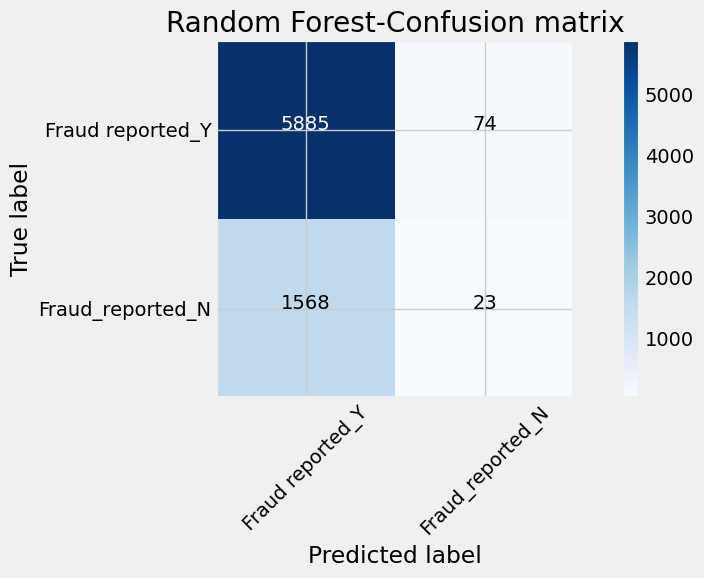

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                      title='Random Forest-Confusion matrix')

#### With 78.25% accuracy, we take a closer look at the confusion matrix:
- 5885 transactions were classified as valid that were actually valid
- 74 transactions were classified as fraud that were actually valid (type 1 error)
- 1568 transactions were classified as valid that were fraud (type 2 error)
- 23 transactions were classified as fraud.
- Error = ((FP+FN)/ (TP+TN+FN+FP) = {(1568+74) / (5885+74+1568+23)}*100 = 21.74

- So, the algorithm misclassified 21.74% fraudulent transactions. We looked at other measures too like the Cohen Kappa, Recall, and F1 score. In each case, the scores are closer to 1.

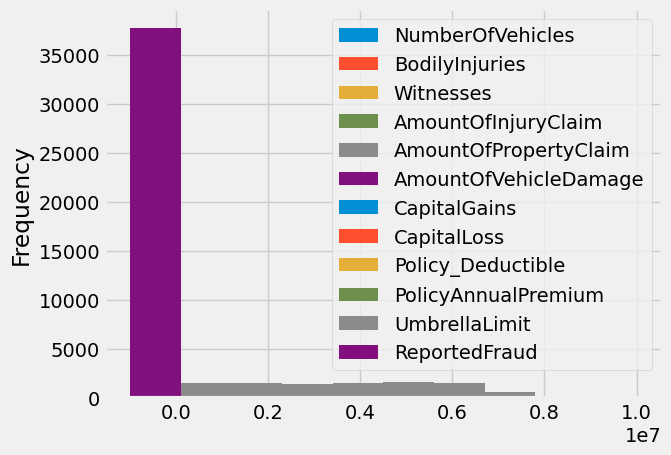

In [63]:
# Generate a Histogram plot for anomaly detection
df.plot(kind='hist')
plt.show()

In [64]:
# Minimum and maximum premium 
print('Minimum Number of Vehicles ' + str(df['NumberOfVehicles'].min()))
print('Maximum Number of Vehicles ' + str(df['NumberOfVehicles'].max()))

Minimum Number of Vehicles 1
Maximum Number of Vehicles 4


In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
                    
pipe3 = make_pipeline(column_trans, xgb)
                    
xgbm = pipe3.fit(X_train,y_train) # fit on training data
                    
y_pred3=pipe3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.07%


In [67]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(max_depth=5)
pipe4 = make_pipeline(column_trans, dtclf)
dtclfm = pipe4.fit(X_train,y_train) # fit on training data
y_pred4=pipe4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred4)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.83%


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
pipe5 = make_pipeline(column_trans, knn)
knnm = pipe5.fit(X_train,y_train) # fit on training data
y_pred5=pipe5.predict(X_test)
accuracy = accuracy_score(y_test,y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.17%


The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

In [71]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

xgb = XGBClassifier()
knn = KNeighborsClassifier(5)
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()

# prepare configuration for cross validation test harness
seed = 4
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=200)))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state)
    cv_results = model_selection.cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]              
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
#performing hyperparameter tuning on selected algorithm using GridSearchCV

from sklearn.model_selection import GridSearchCV

#extracting default parameters from benchmark model
default_params = {}
gparams = xgbm.get_params()

#default parameters have to be wrapped in lists - even single values - so GridSearchCV can take them as inputs
for key in gparams.keys():
    gp = gparams[key]
    default_params[key] = [gp]
    
#benchmark model. Grid search is not performed, since only single values are provided as parameter grid.
#However, cross-validation is still executed
xgbc = GridSearchCV(estimator=xgbm, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)
xgbc.fit(X_train, y_train.values.ravel())

#results dataframe
df3 = pd.DataFrame(xgbc.cv_results_)

y_pred3=xgbc.predict(X_test)

y_train_pred3=xgbc.predict(X_train)

train_accuracy = accuracy_score(y_train,y_train_pred3)
test_accuracy = accuracy_score(y_test,y_pred3)
print("Train accuracy: %.2f%%" % (train_accuracy * 100.0))
print("Test accuracy: %.2f%%" % (test_accuracy * 100.0))

In [ ]:
import pickle

pipe3.predict(pd.DataFrame(columns=['NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim',
                                   'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'CapitalGains',
                                   'CapitalLoss', 'Policy_Deductible', 'PolicyAnnualPremium',
                                   'UmbrellaLimit', 'TypeOfIncident', 'SeverityOfIncident',
                                   'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'Witnesses',
                                    'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
                                   'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit','InsuredRelationship'],
                                   data=np.array([3,1,13417,6071,46013,56700,-48500,1000,1632.73,
                                                  0,'Multi-vehicle Collision','Total Loss','Police',
                                          'State7','City1',0,'MALE','JD','armed-forces','movies',
                                          'State1','100/300',"not-in-family"]).reshape(1,23)))


In [ ]:
import pickle

#create an empty binary file
model_file = open('insurance_fd.pk','wb')

#dump the model into file
pickle.dump(pipe3, model_file)

#close the file
model_file.close()

In [ ]:
df.to_csv('clean_dataset.csv')